<a href="https://colab.research.google.com/github/LyraGeyska/Artifical-Intellegent/blob/main/UTS_AI_LYRA_GEYSKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **UTS ARTIFICAL INTELLEGENT - LYRA GEYSKA (09010623008)**





## **SOAL UTS NO. 1**

 > EVALUASI FUZZY LOGIC UNTUK EVALUASI KERJA MENGGUNAKAN METODE WEIGHTES AVERAGE

1.Sebuah perusahaan menggunakan sistem Fuzzy Logic untuk menilai kinerja karyawan berdasarkan dua faktor:



*   Produktivitas (%): Rendah (≤50%), Sedang (51-75%), Tinggi (≥76%)
*   Disiplin (%): Rendah (≤50%), Normal (51-75%), Baik (≥76%)


Output berupa Tingkat Kinerja Karyawan:


*   Buruk (jika produktivitas rendah dan disiplin rendah)
*   Baik (jika produktivitas sedang dan disiplin normal)
*   Sangat Baik (jika produktivitas tinggi dan disiplin baik)


Jika seorang karyawan memiliki Produktivitas 70% dan Disiplin 80%, hitung hasil akhir evaluasi kinerja menggunakan metode Weighted Average (Rata-rata Bobot).


## Perhitungan Weighted Average

    numerator = (buruk_rep * buruk_val) + (baik_rep * baik_val) + (sangat_baik_rep * sangat_baik_val)
    denominator = buruk_val + baik_val + sangat_baik_val

In [2]:
pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.2 MB/s eta 0:00:00



=== HASIL EVALUASI KINERJA ===
Produktivitas: 70% (Kategori: Sedang)
Disiplin: 80% (Kategori: Baik)

Skor Kinerja: 50.00
Kategori Kinerja: BAIK
Rekomendasi: Pertahankan kinerja


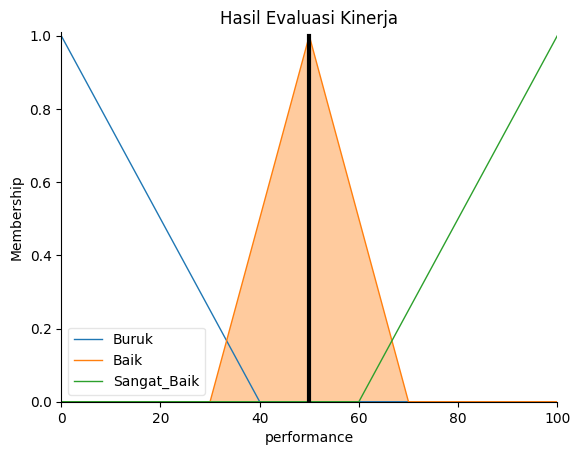

In [18]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Definisi Variabel Fuzzy
productivity = ctrl.Antecedent(np.arange(0, 101, 1), 'productivity')
discipline = ctrl.Antecedent(np.arange(0, 101, 1), 'discipline')
performance = ctrl.Consequent(np.arange(0, 101, 1), 'performance')

# 2. Fungsi Keanggotaan - SESUAI KETENTUAN
# Produktivitas (%): Rendah (≤50%), Sedang (51-75%), Tinggi (≥76%)
productivity['Rendah'] = fuzz.trapmf(productivity.universe, [0, 0, 50, 50])
productivity['Sedang'] = fuzz.trapmf(productivity.universe, [51, 51, 75, 75])
productivity['Tinggi'] = fuzz.trapmf(productivity.universe, [76, 76, 100, 100])

# Disiplin (%): Rendah (≤50%), Normal (51-75%), Baik (≥76%)
discipline['Rendah'] = fuzz.trapmf(discipline.universe, [0, 0, 50, 50])
discipline['Normal'] = fuzz.trapmf(discipline.universe, [51, 51, 75, 75])
discipline['Baik'] = fuzz.trapmf(discipline.universe, [76, 76, 100, 100])

# Kinerja
performance['Buruk'] = fuzz.trimf(performance.universe, [0, 0, 40])
performance['Baik'] = fuzz.trimf(performance.universe, [30, 50, 70])
performance['Sangat_Baik'] = fuzz.trimf(performance.universe, [60, 100, 100])

# 3. Aturan Fuzzy
rules = [
    ctrl.Rule(productivity['Rendah'] & discipline['Rendah'], performance['Buruk']),
    ctrl.Rule(productivity['Sedang'] & discipline['Normal'], performance['Baik']),
    ctrl.Rule(productivity['Tinggi'] & discipline['Baik'], performance['Sangat_Baik']),
    ctrl.Rule(productivity['Sedang'] & discipline['Baik'], performance['Baik']),
    ctrl.Rule(productivity['Tinggi'] & discipline['Normal'], performance['Baik']),
    ctrl.Rule(productivity['Rendah'] & discipline['Normal'], performance['Buruk']),
    ctrl.Rule(productivity['Rendah'] & discipline['Baik'], performance['Buruk']),
    ctrl.Rule(productivity['Sedang'] & discipline['Rendah'], performance['Buruk']),
    ctrl.Rule(productivity['Tinggi'] & discipline['Rendah'], performance['Baik'])
]

# 4. Sistem Kontrol
performance_ctrl = ctrl.ControlSystem(rules)
performance_sim = ctrl.ControlSystemSimulation(performance_ctrl)

# 5. Input Data
prod_value = 70  # Produktivitas 70%
disc_value = 80  # Disiplin 80%

performance_sim.input['productivity'] = prod_value
performance_sim.input['discipline'] = disc_value

# 6. Komputasi Fuzzy
performance_sim.compute()

# 7. Implementasi Weighted Average Manual
def weighted_average_defuzz(performance_sim, performance):
    # Dapatkan derajat keanggotaan
    buruk_val = fuzz.interp_membership(performance.universe, performance['Buruk'].mf, performance_sim.output['performance'])
    baik_val = fuzz.interp_membership(performance.universe, performance['Baik'].mf, performance_sim.output['performance'])
    sangat_baik_val = fuzz.interp_membership(performance.universe, performance['Sangat_Baik'].mf, performance_sim.output['performance'])

    # Titik representatif
    buruk_rep = 20    # Buruk (0-40)
    baik_rep = 50     # Baik (30-70)
    sangat_baik_rep = 80 # Sangat Baik (60-100)

    # Hitung weighted average
    numerator = (buruk_rep * buruk_val) + (baik_rep * baik_val) + (sangat_baik_rep * sangat_baik_val)
    denominator = buruk_val + baik_val + sangat_baik_val

    return numerator / denominator if denominator != 0 else 0

# 8. Hitung Weighted Average
wa_score = weighted_average_defuzz(performance_sim, performance)

# 9. Interpretasi Hasil
def interpret_score(score):
    if score <= 40:
        return "BURUK", "Perlu peningkatan signifikan"
    elif score <= 70:
        return "BAIK", "Pertahankan kinerja"
    else:
        return "SANGAT BAIK", "Kinerja luar biasa"

rating, recommendation = interpret_score(wa_score)

# 10. Output Hasil
print("\n=== HASIL EVALUASI KINERJA ===")
print(f"Produktivitas: {prod_value}% (Kategori: {'Rendah' if prod_value <= 50 else 'Sedang' if prod_value <= 75 else 'Tinggi'})")
print(f"Disiplin: {disc_value}% (Kategori: {'Rendah' if disc_value <= 50 else 'Normal' if disc_value <= 75 else 'Baik'})")
print(f"\nSkor Kinerja: {wa_score:.2f}")
print(f"Kategori Kinerja: {rating}")
print(f"Rekomendasi: {recommendation}")

# 11. Visualisasi (Seperti Kodingan Awal)
performance.view(sim=performance_sim)
plt.title('Hasil Evaluasi Kinerja')
plt.show()

## **SOAL UTS NOMOR 2**

In [22]:
from collections import deque
import time
import os

def clear_screen():
    os.system('cls' if os.name == 'nt' else 'clear')

def draw_river(state, step):
    petani, serigala, kambing, sayur = state
    left_bank = []
    right_bank = []

    # Kumpulkan item di setiap sisi
    if petani == 0:
        left_bank.append("👨 Petani")
    else:
        right_bank.append("👨 Petani")

    if serigala == 0:
        left_bank.append("🐺 Serigala")
    else:
        right_bank.append("🐺 Serigala")

    if kambing == 0:
        left_bank.append("🐐 Kambing")
    else:
        right_bank.append("🐐 Kambing")

    if sayur == 0:
        left_bank.append("🥬 Sayur")
    else:
        right_bank.append("🥬 Sayur")

    # Gambar animasi sungai
    print(f"\n{' LANGKAH ' + str(step) + ' ':~^50}")
    print("\nSISI KIRI:")
    for item in left_bank:
        print(f"  {item}")

    print("\n" + "~"*50 + "> Sungai")

    print("\nSISI KANAN:")
    for item in right_bank:
        print(f"  {item}")

    # Cek kondisi berbahaya
    if petani != 0 and "🐺 Serigala" in left_bank and "🐐 Kambing" in left_bank:
        print("\n⚠️ PERINGATAN: Serigala dan kambing sendirian di sisi kiri!")
    elif petani != 1 and "🐺 Serigala" in right_bank and "🐐 Kambing" in right_bank:
        print("\n⚠️ PERINGATAN: Serigala dan kambing sendirian di sisi kanan!")
    elif petani != 0 and "🐐 Kambing" in left_bank and "🥬 Sayur" in left_bank:
        print("\n⚠️ PERINGATAN: Kambing dan sayur sendirian di sisi kiri!")
    elif petani != 1 and "🐐 Kambing" in right_bank and "🥬 Sayur" in right_bank:
        print("\n⚠️ PERINGATAN: Kambing dan sayur sendirian di sisi kanan!")

def is_valid(state):
    petani, serigala, kambing, sayur = state

    # Jika serigala dan kambing bersama tanpa petani
    if serigala == kambing and petani != serigala:
        return False

    # Jika kambing dan sayur bersama tanpa petani
    if kambing == sayur and petani != kambing:
        return False

    return True

def generate_next_states(current_state):
    moves = []
    petani, serigala, kambing, sayur = current_state

    # Petani bisa menyeberang sendiri atau membawa 1 item
    possible_moves = [
        (1 - petani, serigala, kambing, sayur),  # Petani saja
        (1 - petani, 1 - serigala, kambing, sayur),  # Bawa serigala
        (1 - petani, serigala, 1 - kambing, sayur),  # Bawa kambing
        (1 - petani, serigala, kambing, 1 - sayur)   # Bawa sayur
    ]

    for move in possible_moves:
        if is_valid(move):
            moves.append(move)

    return moves

def bfs_solution():
    initial_state = (0, 0, 0, 0)  # Semua di sisi awal
    goal_state = (1, 1, 1, 1)     # Semua di sisi seberang

    visited = set()
    queue = deque()
    queue.append((initial_state, []))  # (state, path)

    while queue:
        current_state, path = queue.popleft()

        if current_state == goal_state:
            return path + [current_state]

        if current_state not in visited:
            visited.add(current_state)

            for next_state in generate_next_states(current_state):
                if next_state not in visited:
                    queue.append((next_state, path + [current_state]))

    return None  # Tidak ada solusi

def animate_solution(solution):
    if not solution:
        print("Tidak ditemukan solusi!")
        return

    for step, state in enumerate(solution):
        clear_screen()
        draw_river(state, step)

        # Beri penjelasan langkah
        if step > 0:
            prev_state = solution[step-1]
            moved = []

            # Cari apa yang berubah
            if state[0] != prev_state[0]:  # Petani pindah
                if state[1] != prev_state[1]:
                    moved.append("serigala")
                elif state[2] != prev_state[2]:
                    moved.append("kambing")
                elif state[3] != prev_state[3]:
                    moved.append("sayur")
                else:
                    moved.append("sendiri")

            direction = "kanan" if state[0] == 1 else "kiri"
            if moved[0] == "sendiri":
                print(f"\nPetani menyebrang ke sisi {direction} sendiri")
            else:
                print(f"\nPetani membawa {moved[0]} ke sisi {direction}")

        time.sleep(2)  # Jeda antara langkah

# Jalankan solusi
solution = bfs_solution()
animate_solution(solution)

# Tampilkan ringkasan akhir
clear_screen()
print("\nSOLUSI SELESAI! Semua berhasil menyeberang dengan selamat!")
print("\nRincian langkah:")
for i in range(len(solution)):
    if i == 0:
        print(f"Langkah {i}: Keadaan awal")
    else:
        prev = solution[i-1]
        curr = solution[i]

        # Cari perubahan
        if curr[1] != prev[1]:
            item = "serigala"
        elif curr[2] != prev[2]:
            item = "kambing"
        elif curr[3] != prev[3]:
            item = "sayur"
        else:
            item = "sendiri"

        direction = "kanan" if curr[0] == 1 else "kiri"
        print(f"Langkah {i}: Petani membawa {item} ke sisi {direction}")


~~~~~~~~~~~~~~~~~~~ LANGKAH 0 ~~~~~~~~~~~~~~~~~~~~

SISI KIRI:
  👨 Petani
  🐺 Serigala
  🐐 Kambing
  🥬 Sayur

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~> Sungai

SISI KANAN:

~~~~~~~~~~~~~~~~~~~ LANGKAH 1 ~~~~~~~~~~~~~~~~~~~~

SISI KIRI:
  🐺 Serigala
  🥬 Sayur

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~> Sungai

SISI KANAN:
  👨 Petani
  🐐 Kambing

Petani membawa kambing ke sisi kanan

~~~~~~~~~~~~~~~~~~~ LANGKAH 2 ~~~~~~~~~~~~~~~~~~~~

SISI KIRI:
  👨 Petani
  🐺 Serigala
  🥬 Sayur

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~> Sungai

SISI KANAN:
  🐐 Kambing

Petani menyebrang ke sisi kiri sendiri

~~~~~~~~~~~~~~~~~~~ LANGKAH 3 ~~~~~~~~~~~~~~~~~~~~

SISI KIRI:
  🥬 Sayur

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~> Sungai

SISI KANAN:
  👨 Petani
  🐺 Serigala
  🐐 Kambing

Petani membawa serigala ke sisi kanan

~~~~~~~~~~~~~~~~~~~ LANGKAH 4 ~~~~~~~~~~~~~~~~~~~~

SISI KIRI:
  👨 Petani
  🐐 Kambing
  🥬 Sayur

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~> S